# Exploratory data analysis

##Kallisto
transcripts per million output was obtained from cluster

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
c3=sns.color_palette()[3]

In [3]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [4]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

###Looking at a single file

In [5]:
Fr188_C1=pd.read_csv("/Users/leandraking/Desktop/KallistoFiles/Fr188_C1_TTAGGC/abundance.tsv",sep="\t")


In [6]:
Fr188_C1.head()

,target_id,length,eff_length,est_counts,tpm
0,FBtr0071764,5173,4974,33.8472,0.504464
1,FBtr0100521,4665,4466,179.1580,2.973920
2,FBtr0071763,4847,4648,142.0220,2.265180
3,FBtr0342981,3897,3698,36.9729,0.741191
4,FBtr0083388,3935,3736,103.4280,2.052320


Checking that tpm sum up to 1000000

In [7]:
sum(Fr188_C1.tpm) , len(Fr188_C1)

(999999.92981562519, 30446)

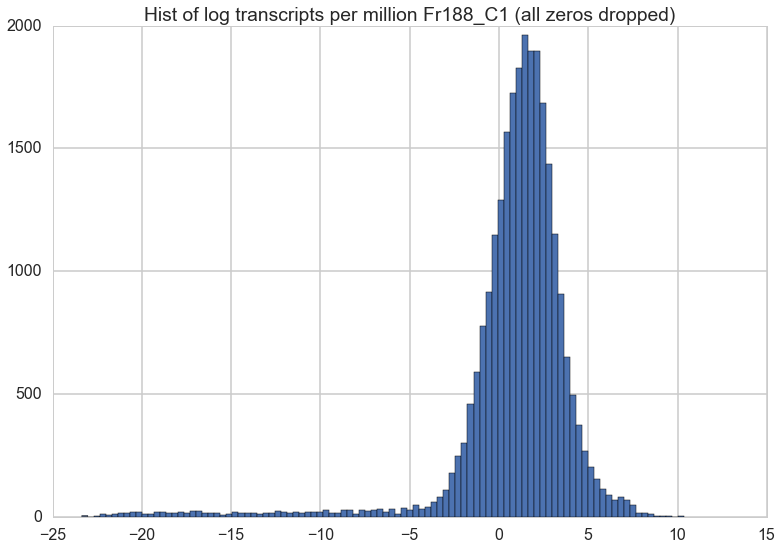

In [8]:
plt.hist(np.log(Fr188_C1[Fr188_C1.tpm>0].tpm), bins=100)
plt.title("Hist of log transcripts per million Fr188_C1 (all zeros dropped)")
plt.show()

###Looking at the output of all Fr files

In [9]:
#Create a dataframe with tpm data from all files
import glob
import string
files_dict={}
for fl in glob.glob("../KallistoFiles/*"):
    a= string.join(fl.split('/')[2].split('_')[:2], sep="_")
    if a:
        files_dict[a]=pd.read_csv(fl+"/abundance.tsv", sep="\t").tpm

LoadedData=pd.DataFrame(files_dict)

In [10]:
LoadedData

,Fr188_C1,Fr188_C2,Fr188_C3,Fr188_T3,Fr188_T5,Fr188_T6,Fr89_C1,Fr89_C2,Fr89_C4,Fr89_T3,Fr89_T4,Fr89_T5,Zi238_C1,Zi238_C2,Zi238_C3,Zi238_C4,Zi238_T2,Zi238_T3,Zi238_T4,Zi257_C1,Zi257_C2,Zi257_C3,Zi257_T1,Zi257_T2,Zi257_T3,Zi257_T4
0,5.044640e-01,1.284890e+00,0.614044,0.000000,0.000000,0.000000,4.403690e-01,6.911640e-01,2.622040e-01,0.000000e+00,0.147861,0.000000e+00,0.440267,0.652083,0.894199,0,1.548400e-01,0.000000e+00,1.332420e-01,0.000000,5.717800e-01,3.793600e-01,0.000000e+00,1.053090e-01,0.000000e+00,0.000000e+00
1,2.973920e+00,4.151500e+00,5.322480,3.704150,5.352650,3.635080,1.049610e+01,8.771190e+00,1.165150e+00,4.027210e+00,3.819260,5.205890e+00,4.586930,5.192110,1.115020,0,4.127860e+00,3.603360e+00,4.166850e+00,5.085260,8.403610e+00,6.086740e+00,5.779740e+00,4.997630e+00,3.462310e+00,5.692480e+00
2,2.265180e+00,1.434560e+00,0.000000,0.000000,0.000000,0.461069,1.724620e+00,5.635220e-01,5.122970e+00,0.000000e+00,0.000000,0.000000e+00,2.278640,1.485840,5.823160,0,0.000000e+00,0.000000e+00,3.517570e-01,5.272870,0.000000e+00,4.235500e+00,4.136940e-01,0.000000e+00,3.299900e-01,0.000000e+00
3,7.411910e-01,3.509530e-01,0.000484,0.000000,0.445147,0.000000,9.234830e-01,0.000000e+00,1.166280e+00,1.586180e-01,0.428323,0.000000e+00,0.429408,0.000000,0.000000,0,1.491710e-07,4.118390e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2.052320e+00,6.903470e-01,1.806490,3.434840,4.507330,4.265000,2.172480e+00,8.692590e-01,1.108070e+00,3.678080e+00,3.580640,3.870750e+00,2.379780,2.346690,3.902570,0,4.123990e+00,5.012800e+00,4.700970e+00,1.882960,2.121890e+00,2.377210e+00,4.582620e+00,3.783650e+00,4.419640e+00,2.670300e+00
5,0.000000e+00,2.159080e-04,0.000000,0.000000,0.000000,0.000000,8.843480e-09,0.000000e+00,0.000000e+00,6.333150e-08,0.000000,0.000000e+00,0.931308,0.000000,0.000000,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,3.465530e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,2.123370e+00,2.843080e+00,1.079040,2.250950,1.430610,1.148890,7.804830e-01,2.652160e+00,2.297920e+00,1.350640e+00,1.278100,1.688900e+00,0.937492,1.775570,1.300070,0,2.135120e+00,7.511200e-01,1.449810e+00,0.529073,1.275410e+00,1.120560e+00,1.143240e+00,1.397810e+00,8.276480e-01,1.475130e+00
7,1.252960e+00,3.677330e-01,0.878684,0.768119,0.408021,0.354569,1.147010e+00,5.368240e-01,9.380350e-01,3.701580e-01,0.227420,2.322400e-01,1.317800,1.600720,0.426550,0,4.604180e-01,1.676400e-01,2.954470e-01,1.023170,1.636420e+00,1.085720e+00,3.426630e-01,4.520870e-01,5.921230e-01,4.212530e-01
8,1.038980e+00,2.410330e+00,1.266180,1.162580,1.233560,0.648241,4.096390e+00,6.752220e-01,0.000000e+00,1.330500e+00,1.060180,1.606750e+00,3.993000,3.235860,2.240550,0,2.058700e+00,2.291420e+00,6.650590e-01,1.054720,1.919640e+00,1.345760e+00,1.924310e-01,1.118320e+00,2.231420e+00,7.582130e-01
9,3.221810e-08,1.800850e+00,0.000000,1.290720,1.270280,0.448723,6.765220e-10,1.249760e+00,5.658870e-01,1.443800e+00,0.000000,5.079950e-01,0.000000,0.981835,2.668020,0,0.000000e+00,9.001110e-01,1.517710e+00,0.469499,3.258440e+00,1.829740e+00,2.602960e+00,2.237640e+00,5.408250e-01,1.300370e+00


###Do a PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X = pca.fit_transform(LoadedData.transpose())

//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [12]:
print pca.explained_variance_ratio_.sum()

1.0


In [13]:
pca.explained_variance_ratio_*100

array([  7.52801689e+01,   1.72597998e+01,   4.90974923e+00,
         9.45304187e-01,   5.52002110e-01,   3.54150269e-01,
         2.72988302e-01,   9.53703335e-02,   8.94500230e-02,
         6.78247285e-02,   3.69397135e-02,   2.37528529e-02,
         2.27045440e-02,   1.64706681e-02,   1.36633287e-02,
         1.27654231e-02,   1.17467993e-02,   7.89890982e-03,
         6.32380373e-03,   5.42984463e-03,   4.41862789e-03,
         3.87113957e-03,   3.32985515e-03,   2.57134247e-03,
         1.30524287e-03,   1.03545849e-28])

The variance is really explained here by the first two components

In [14]:
#Labeling with either a C or T
TorClabels=[a.split('_')[1][0] for a in LoadedData.columns]
lineLabels=[filter(str.isdigit,a.split('_')[0]) for a in LoadedData.columns]
countryLabels=[a[:2] for a in LoadedData.columns]
dfPCA = pd.DataFrame({"TorC":TorClabels, "lines":lineLabels, "country":countryLabels})
for i in range(pca.explained_variance_ratio_.shape[0]):
    dfPCA["pc%i" % (i+1)] = X[:,i]
dfPCA


,TorC,country,lines,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26
0,C,Fr,188,-77861.212494,-20579.532686,189.496710,-20533.003250,167.058036,-1471.608864,5322.687246,-784.681769,2085.963593,-3789.205860,2922.461683,-499.323103,-1796.480254,1020.716837,1630.082631,2405.584889,1340.180561,-329.985166,-373.460795,-335.212381,-157.912675,-12.357166,-64.871539,-51.442106,-41.954812,-9.635260e-11
1,C,Fr,188,-79481.413308,-19918.021405,2440.643167,-6389.973790,1330.481159,574.600991,-3268.615543,89.951099,-2724.114930,1484.747413,-2518.907157,-81.511894,1407.733065,1660.070632,-690.114787,-865.539749,1944.767066,-565.993597,-1443.132395,734.682713,-287.727586,315.623118,-1224.162393,-567.792649,-2.082639,-9.635260e-11
2,C,Fr,188,-77842.080732,-15803.318013,-1966.579994,16735.661162,-2738.120782,-1175.183780,-3210.845955,242.083614,-1916.295274,-4847.769238,-1478.543633,743.738225,1131.632639,2829.512050,295.057571,513.756239,745.900457,21.548802,1100.687861,815.907370,478.223358,-431.472921,647.329424,629.091470,129.376831,-9.635260e-11
3,T,Fr,188,58623.691167,1323.325916,-95951.630416,1825.564434,6253.525368,3712.598062,2516.612804,1286.962613,-965.881743,111.698729,368.954757,755.340925,-451.598481,68.494108,542.504185,-398.777641,-52.131248,123.001964,-42.662084,33.658323,213.808730,379.013543,-90.882021,-54.618358,202.298238,-9.635260e-11
4,T,Fr,188,78462.061972,1756.560923,8353.103837,1913.075529,4074.178346,3287.373496,1000.186467,-1876.912076,1981.438476,-455.455201,-1223.743537,-1303.198620,1877.768617,-1296.193727,-1091.550489,2108.431432,497.586018,484.493742,335.146357,170.181669,893.477856,1638.028593,-420.379213,622.492252,-219.950251,-9.635260e-11
5,T,Fr,188,95112.715682,3632.929481,-2121.465440,-4571.491014,-11027.603812,-2904.803051,-3979.437264,-9087.474587,1818.110652,309.764479,-1495.565242,3684.575386,-955.415513,-387.426786,70.513698,-264.721055,130.075871,-1158.812477,7.174275,-280.583199,151.435437,73.645961,66.121928,73.224859,101.421597,-9.635260e-11
6,C,Fr,89,-72345.467140,-16925.120707,3217.270937,9490.509301,1646.655305,1250.269822,-5518.279509,297.982348,2567.242834,218.081256,1414.728710,395.049781,118.270486,-573.773250,447.105118,173.042277,-1071.307518,-262.608885,-1868.791253,989.600574,-842.900189,938.460884,1324.974939,-65.214445,-97.110113,-9.635260e-11
7,C,Fr,89,-86973.347389,-21397.427009,-484.812748,-11128.064743,1002.648957,310.605147,-1865.644535,743.894318,-1775.586352,5101.087377,-1159.844221,-420.165716,-1147.854172,245.013433,219.027247,1468.665715,-2615.669605,-995.588954,1204.134363,1226.631444,55.203821,-169.638770,-335.552523,143.145814,46.536877,-9.635260e-11
8,C,Fr,89,-83529.546423,-16705.344734,-1588.784673,10241.953603,-7480.291301,-3503.980229,16873.176589,-762.925741,5960.603264,3206.728239,19.232196,295.801061,1092.179940,821.371100,-721.792412,-563.010415,-254.363462,225.107408,39.442693,156.019117,303.752169,-219.778943,35.961859,-383.462027,-159.723444,-9.635260e-11
9,T,Fr,89,85310.553746,3043.187831,7733.378549,-2969.006163,-8318.719777,-1998.819669,1530.736022,6856.432170,-3756.086346,206.625405,2559.642009,2813.041550,-1250.469310,402.667466,-2287.597243,88.352929,194.199823,-185.517505,-96.921507,7.588956,5.164091,249.612211,9.982929,353.484652,-604.129539,-9.635260e-11


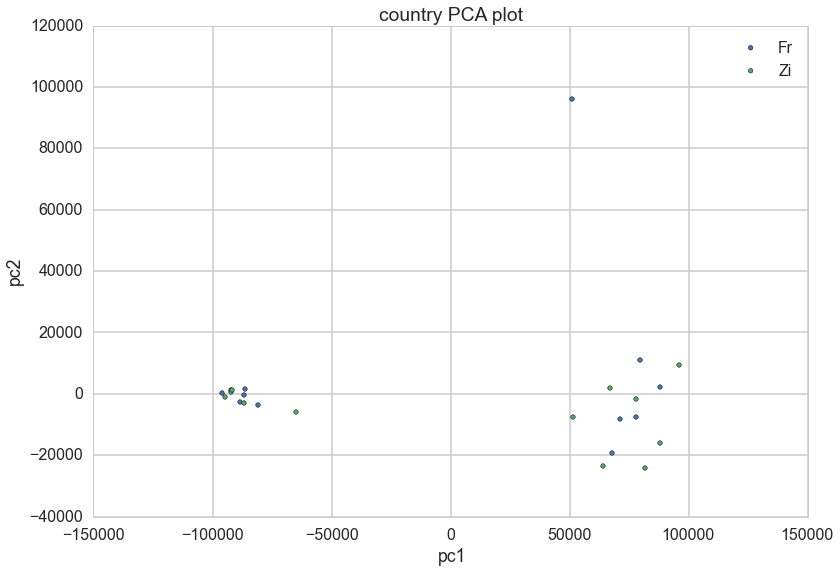

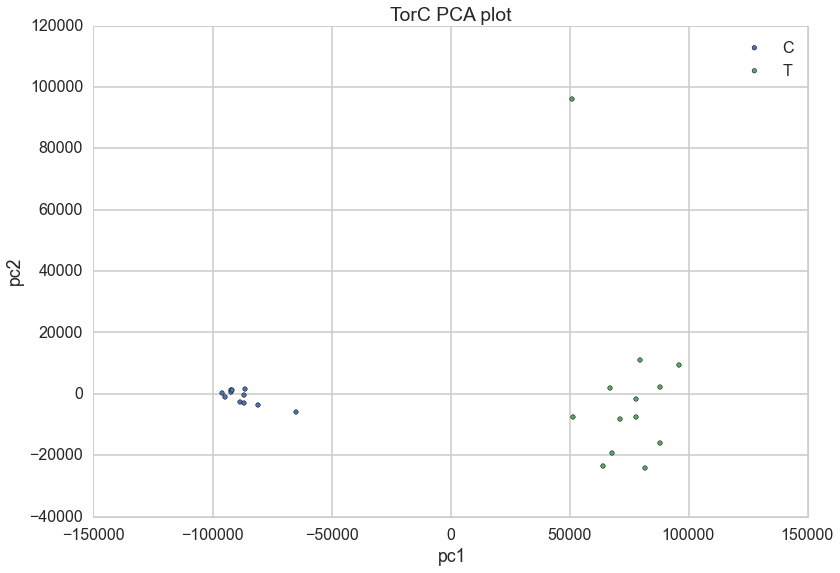

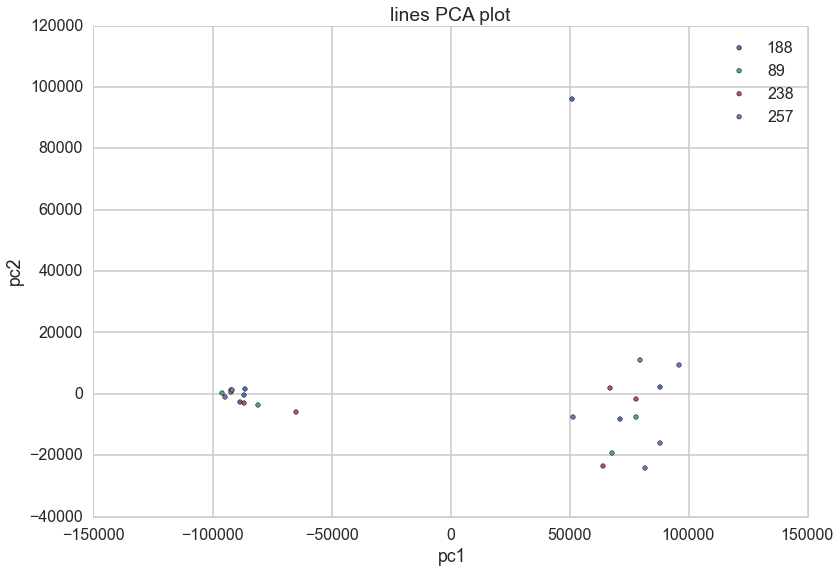

In [29]:
def plot_PCA(labelName, df, firstComponent="pc1", secondComponent="pc2"):
    plt.figure()
    colors = [c0, c1, c2, c3]
    for label, color in zip(df[labelName].unique(), colors):
        mask = df[labelName]==label
        plt.scatter(df[mask][firstComponent], df[mask][secondComponent], c=color, label=label)
    plt.legend()
    plt.title(labelName +" PCA plot")
    plt.xlabel(firstComponent)
    plt.ylabel(secondComponent)
    plt.show()

plot_PCA("country",dfPCA)
plot_PCA("TorC", dfPCA)
plot_PCA("lines",dfPCA)

Carcass points cluster together.  Lines do not cluster together.  One strain of zimbabwe carcass 238 sticks out.

##Removing weird Zi carcass 238 strain

In [24]:
del LoadedData["Zi238_C4"]
print LoadedData.columns
pca = PCA(n_components=50)
X = pca.fit_transform(LoadedData.transpose())
pca.explained_variance_ratio_*100

Index([u'Fr188_C1', u'Fr188_C2', u'Fr188_C3', u'Fr188_T3', u'Fr188_T5', u'Fr188_T6', u'Fr89_C1', u'Fr89_C2', u'Fr89_C4', u'Fr89_T3', u'Fr89_T4', u'Fr89_T5', u'Zi238_C1', u'Zi238_C2', u'Zi238_T2', u'Zi238_T3', u'Zi238_T4', u'Zi257_C1', u'Zi257_C2', u'Zi257_C3', u'Zi257_T1', u'Zi257_T2', u'Zi257_T3', u'Zi257_T4'], dtype='object')


array([  9.02156424e+01,   6.53494618e+00,   1.17716997e+00,
         7.21569807e-01,   4.71291242e-01,   3.60476801e-01,
         1.26885098e-01,   1.19042858e-01,   6.17076851e-02,
         4.52463782e-02,   3.15243118e-02,   3.01068310e-02,
         2.18447208e-02,   1.78466406e-02,   1.66319204e-02,
         1.07421150e-02,   8.65171852e-03,   7.41986936e-03,
         6.22940930e-03,   5.22457467e-03,   4.48354820e-03,
         3.56415678e-03,   1.75175258e-03,   4.38839095e-29])

In [25]:
#Labeling with either a C or T
TorClabels=[a.split('_')[1][0] for a in LoadedData.columns]
lineLabels=[filter(str.isdigit,a.split('_')[0]) for a in LoadedData.columns]
countryLabels=[a[:2] for a in LoadedData.columns]
dfPCA = pd.DataFrame({"TorC":TorClabels, "lines":lineLabels, "country":countryLabels})
for i in range(pca.explained_variance_ratio_.shape[0]):
    dfPCA["pc%i" % (i+1)] = X[:,i]
dfPCA


,TorC,country,lines,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
0,C,Fr,188,-86671.951605,-469.068842,21567.910072,1893.894346,-1342.819012,-5971.470976,-777.393996,-2121.099578,6749.992504,-621.412787,45.133369,-1328.748103,-23.549552,37.744719,-1470.991776,85.521499,-764.595993,473.642993,49.153718,119.814787,139.576021,137.383579,57.363304,5.657755e-11
1,C,Fr,188,-88327.065811,-2769.029394,7785.209855,2415.453068,755.290616,2806.769650,32.819178,2806.063852,-1365.986609,-2436.163095,-36.515649,1605.978740,-1327.716245,840.585204,1899.794297,-305.438199,-1565.283428,-799.578447,-76.903191,-105.882784,1332.767120,532.262329,-7.723477,5.657755e-11
2,C,Fr,188,-86363.666234,1627.355323,-15551.091410,-3501.363207,-1244.566168,3654.451407,499.125603,1706.345431,3719.866658,-3336.404893,994.379520,1640.090570,-2227.745194,249.093795,-31.667571,23.979380,1018.992036,-551.473942,752.973852,344.293420,-704.886897,-570.911129,-108.263568,5.657755e-11
3,T,Fr,188,51103.308076,95937.918269,-2530.297911,5949.079921,3705.906881,-2618.042348,1287.520489,957.970943,159.294765,312.981084,789.567959,-384.443289,-55.469901,-652.402152,183.173814,118.701662,-37.464083,-39.213803,151.659112,-403.786452,109.077523,47.298630,-203.981565,5.657755e-11
4,T,Fr,188,71049.201069,-8347.540398,-2216.041553,3878.884844,3290.438312,-1035.541977,-1896.263985,-1972.805147,-52.718479,-1321.658750,-1410.006593,1797.021644,1532.156462,2001.399570,-1160.024756,554.325485,322.545127,-77.290835,648.860147,-1744.635079,463.182102,-616.969761,233.092611,5.657755e-11
5,T,Fr,188,87782.874015,2156.771333,5335.903951,-10621.392277,-2915.648081,4204.770322,-9096.366602,-1691.151212,-1058.405646,-1000.084213,3755.995782,-646.760497,446.910702,-81.008360,319.951008,-1131.049978,-127.349204,349.869061,107.616596,-107.676746,-75.989159,-79.495381,-101.409122,5.657755e-11
6,C,Fr,89,-80996.274535,-3553.208855,-8216.370972,1620.929145,1341.328382,5471.409520,243.378328,-2560.578009,199.408563,1537.680540,290.938809,31.662538,455.605411,-604.332963,-797.048375,-391.866546,-1459.647123,-1466.626668,-1201.425395,-895.766785,-1196.632848,225.539495,106.410668,5.657755e-11
7,C,Fr,89,-95926.310590,143.318471,12745.563258,2530.591668,537.391561,1142.221398,505.936850,2002.016611,-4062.567913,300.208138,-431.860660,-1306.457966,-551.290331,-352.137445,-2674.703880,-1371.479842,1378.208121,-1062.401485,319.539153,219.747455,326.969288,-172.465789,-46.588525,5.657755e-11
8,C,Fr,89,-92084.176360,1251.430606,-8826.318296,-7954.719034,-3738.141289,-16774.131575,-1035.264389,-5804.142049,-2690.041056,1221.581905,80.445958,971.703545,-1073.415015,269.248873,393.460400,156.978291,66.359233,-142.872214,355.272581,169.524079,-53.320313,355.764472,148.254828,5.657755e-11
9,T,Fr,89,78003.458876,-7707.310379,3485.137055,-8109.016734,-2056.233265,-1447.182865,6904.083562,3659.718616,515.564610,2733.508170,2761.113469,-1191.949650,-698.040907,2050.690116,450.810178,-240.182102,-30.360521,-60.685991,-109.883526,-274.420843,-22.041350,-340.863037,610.948075,5.657755e-11


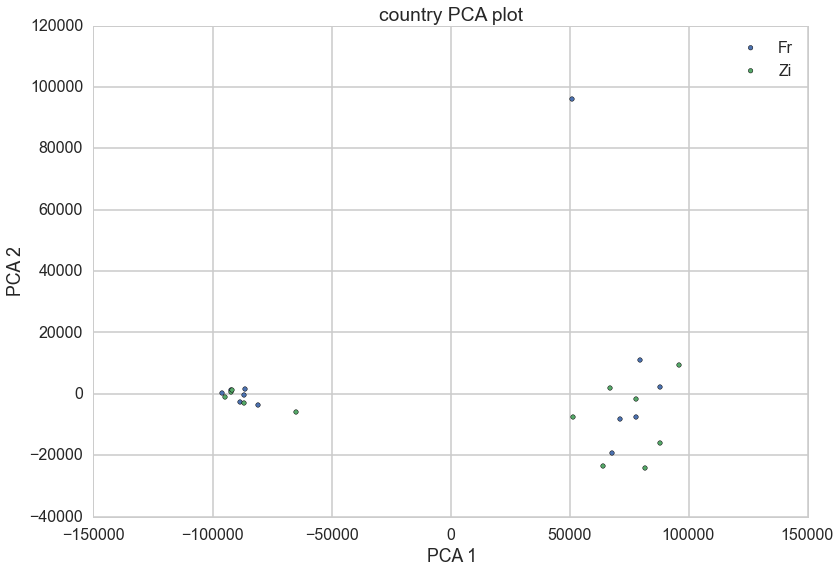

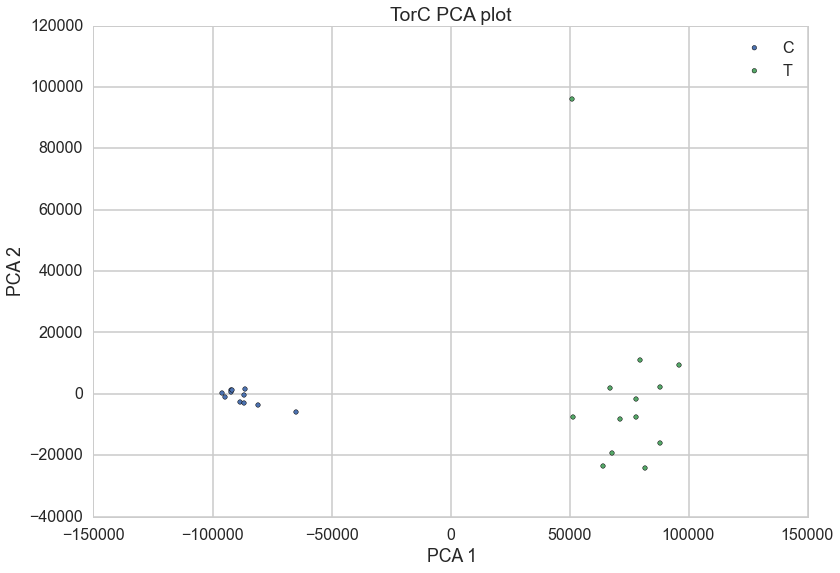

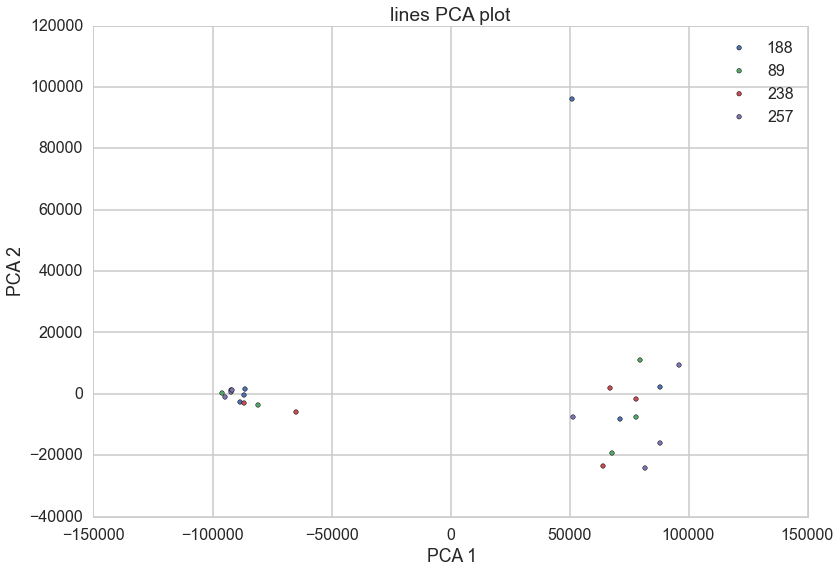

In [26]:
plot_PCA("country",dfPCA)
plot_PCA("TorC", dfPCA)
plot_PCA("lines",dfPCA)

Plotting 2nd and 3rd components

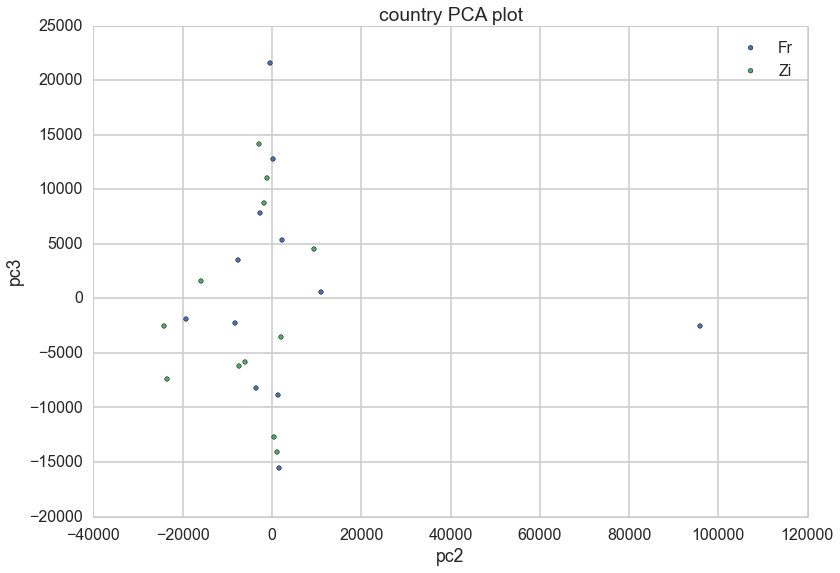

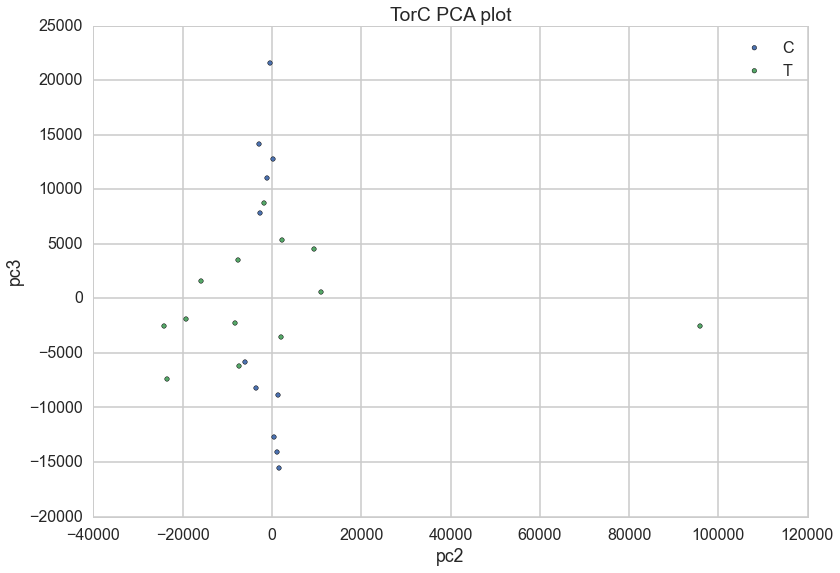

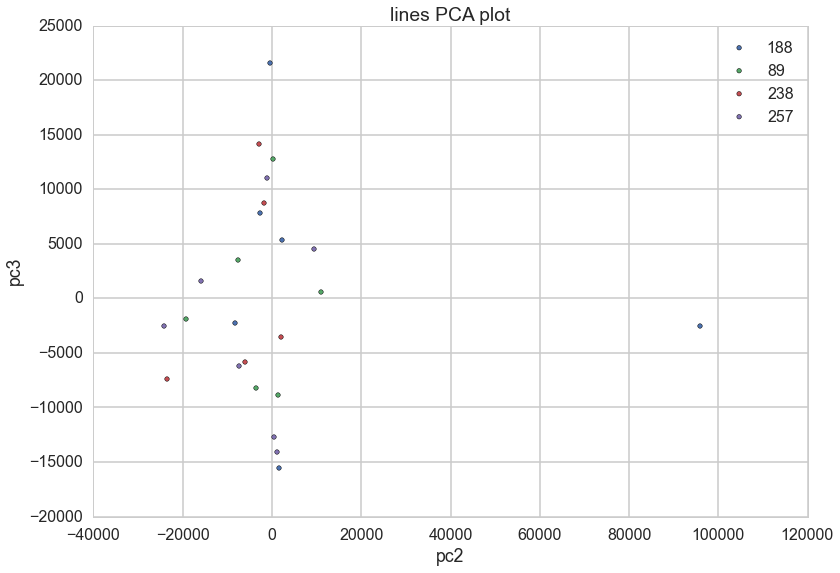

In [30]:
plot_PCA("country",dfPCA, firstComponent="pc2", secondComponent="pc3")
plot_PCA("TorC", dfPCA, firstComponent="pc2", secondComponent="pc3")
plot_PCA("lines",dfPCA, firstComponent="pc2", secondComponent="pc3")

##Let's now consider carcass only carcass data

In [18]:
TorClabels=[a.split('_')[1][0] for a in LoadedData.columns]
dfCarcass=LoadedData[[col for lab,col in zip(TorClabels,LoadedData.columns) if lab=="C"]]
pca = PCA(n_components=10)
X = pca.fit_transform(dfCarcass.transpose())
pca.explained_variance_ratio_*100

array([  9.16880089e+01,   4.38263275e+00,   2.45870635e+00,
         8.62962528e-01,   2.62094645e-01,   1.21191651e-01,
         7.86872866e-02,   5.27237795e-02,   3.88231583e-02,
         3.07766761e-02])

In [19]:
lineLabels=[filter(str.isdigit,a.split('_')[0]) for a in dfCarcass.columns]
countryLabels=[a[:2] for a in dfCarcass.columns]
dfCarcassPCA = pd.DataFrame({"lines":lineLabels, "country":countryLabels})
for i in range(pca.explained_variance_ratio_.shape[0]):
    dfCarcassPCA["pc%i" % (i+1)] = X[:,i]
dfCarcassPCA

,country,lines,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,Fr,188,-19658.153485,-20951.593931,-197.745265,7950.382897,6634.531479,-1193.542462,1147.695031,-7.529373,926.823236,516.877272
1,Fr,188,-18882.113107,-7806.718672,-1899.132487,-3901.462780,-240.723687,3140.810885,-1510.000047,-2454.802309,1622.882470,-1370.221363
2,Fr,188,-15176.206396,16212.930643,744.322270,-3110.809097,4974.486722,3796.130642,791.638199,1079.926123,-1066.953534,-427.661592
3,Fr,89,-17021.764525,9054.301544,-8120.099620,-512.520158,-1798.542817,-698.986702,-195.813175,3139.353801,2317.167362,-411.938602
4,Fr,89,-19277.996317,-13798.228945,4857.383506,-5796.139817,-2672.486372,-1510.665119,3459.244260,330.948941,-1014.675339,-1585.659061
5,Fr,89,-15228.727983,8438.124658,15863.078386,13216.709770,-4074.604916,1349.258210,163.724790,-189.781623,-110.795862,-207.526387
6,Zi,238,-17383.742215,9544.925157,-24138.013971,5738.759445,-966.432871,-1488.336629,-40.592762,-1271.457031,-1354.654687,-424.841705
7,Zi,238,-19334.683831,-14778.519038,-5956.863231,-3034.336889,-3876.301338,2537.124556,364.763537,295.815168,-339.766445,2509.218611
8,Zi,238,192599.491720,-1140.150580,-243.439779,-69.448029,-11.269400,-16.306550,-11.616777,-0.668585,2.937839,-7.353660
9,Zi,257,-15930.279704,12999.964229,6616.058058,-4985.821031,-211.774624,-3303.321243,24.701091,-1656.886335,1210.405530,796.735151


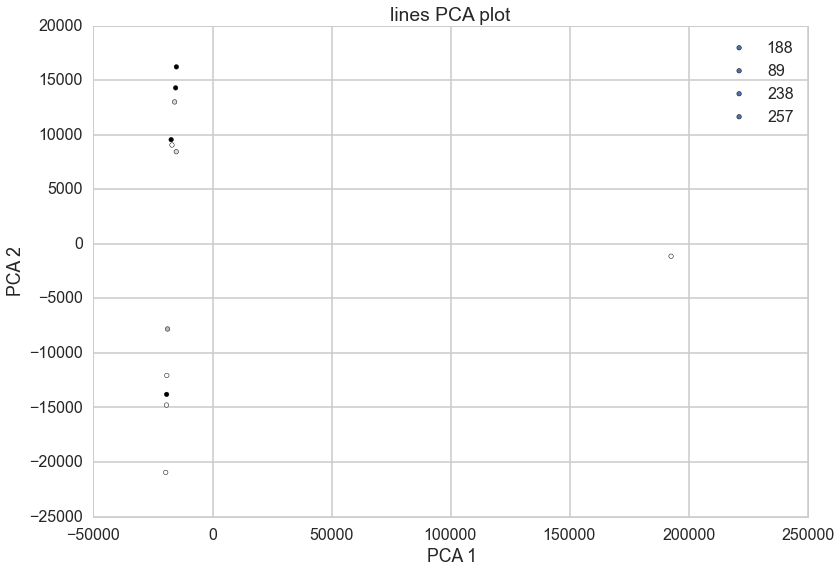

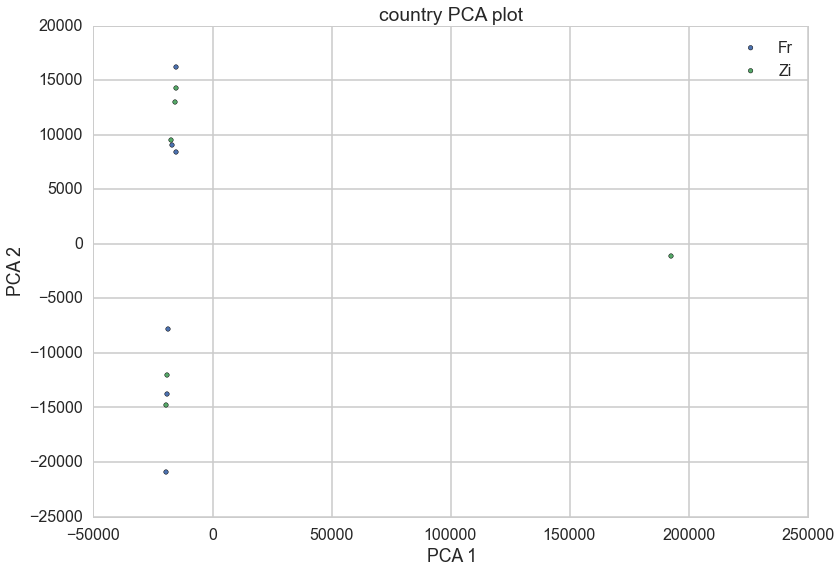

In [20]:
plot_PCA("lines",dfCarcassPCA)
plot_PCA("country", dfCarcassPCA)